In [39]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [40]:
type(data)

dict

In [41]:
import pandas as pd


#This allows you to see all the columns, not just like 500
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12558,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.998473e+07,1.998473e+07,False,1.383251e+12,NaN,1,NaN,NaN,None,2026-02-05T13:31:00.000Z,69215.371993,8.966334e+10,34.7378,-0.646140,-8.618401,-21.322975,-26.138105,-22.232682,-30.844881,1.383251e+12,58.5073,1.453523e+12,None,2026-02-05T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 16:34:25.791605
1,1027,Ethereum,ETH,ethereum,11531,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206935e+08,1.206935e+08,True,2.472332e+11,NaN,2,NaN,NaN,None,2026-02-05T13:31:00.000Z,2048.438363,5.589434e+10,19.9318,-1.101867,-8.169354,-30.145310,-36.666199,-32.487168,-36.745490,2.472332e+11,10.4677,2.472332e+11,None,2026-02-05T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 16:34:25.791605
2,825,Tether USDt,USDT,tether,170166,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.857160e+11,1.904757e+11,True,1.901208e+11,NaN,3,NaN,NaN,None,2026-02-05T13:31:00.000Z,0.998136,1.728907e+11,24.5596,-0.043818,-0.026830,-0.024474,-0.127415,-0.214453,-0.122742,1.853700e+11,7.8406,1.901208e+11,None,2026-02-05T13:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-05 16:34:25.791605
3,1839,BNB,BNB,bnb,3128,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363598e+08,1.363598e+08,1.363598e+08,False,9.139964e+10,NaN,4,NaN,NaN,None,2026-02-05T13:31:00.000Z,670.283024,4.073841e+09,49.8712,-0.827567,-10.294103,-24.704518,-26.629697,-24.440310,-28.346932,9.139964e+10,3.8694,9.139964e+10,None,2026-02-05T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 16:34:25.791605
4,52,XRP,XRP,xrp,1796,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.091732e+10,9.998572e+10,False,1.346804e+11,NaN,5,NaN,NaN,None,2026-02-05T13:31:00.000Z,1.346996,6.754879e+09,64.4979,-1.492291,-14.760011,-28.050617,-43.186318,-33.772986,-38.280949,8.205540e+10,3.4742,1.346996e+11,None,2026-02-05T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 16:34:25.791605
5,3408,USDC,USDC,usd-coin,37206,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.065467e+10,7.065467e+10,False,7.062697e+10,NaN,6,6.090122e+10,6.087734e+10,None,2026-02-05T13:31:00.000Z,0.999608,2.697412e+10,36.5398,-0.034203,-0.003614,-0.008291,0.000699,-0.052246,-0.003973,7.062697e+10,2.9900,7.062697e+10,None,2026-02-05T13:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-05 16:34:25.791605
6,5426,Solana,SOL,solana,1087,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.665439e+08,6.197176e+08,True,5.482172e+10,NaN,7,5.252369e+08,4.646373e+10,None,2026-02-05T13:31:00.000Z,88.462419,8.467592e+09,29.6286,-1.230664,-7.519670,-27.977269,-36.386185,-32.946671,-41.817913,5.011784e+10,2.1220,5.482172e+10,None,2026-02-05T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 16:34:25.791605
7,1958,TRON,TRX,tron,1296,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.471794e+10,9.471794e+10,True,2.633840e+10,NaN,8,9.466789e+10,2.632448e+10,None,2026-02-05T13:32:00.000Z,0.278072,9.357577e+08,18.6967,0.032073,-2.247140,-5.609576,-4.718943,-2.428634,-2.257685,2.633840e+10,1.1151,2

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    if df.empty:
       df = df2.copy()
    else:
        df = pd.concat([df, df2], ignore_index=True)



    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\hp\Desktop\Python tutorial\Python Web Scraping\API.csv"):
        df.to_csv(r"C:\Users\hp\Desktop\Python tutorial\Python Web Scraping\API.csv")
    else:
        df.to_csv(r"C:\Users\hp\Desktop\Python tutorial\Python Web Scraping\API.csv", mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [12]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [17]:
df72 = pd.read_csv(r"C:\Users\hp\Desktop\Python tutorial\Python Web Scraping\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12555,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.998448e+07,1.998448e+07,False,1.443160e+12,NaN,1,NaN,NaN,NaN,2026-02-04T21:54:00.000Z,72214.042299,6.438663e+10,-4.5251,-1.579568,-5.178853,-19.136583,-23.321566,-19.287050,-28.596918,1.443160e+12,58.7852,1.516495e+12,NaN,2026-02-04T21:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
1,1,1027,Ethereum,ETH,ethereum,11525,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206936e+08,1.206936e+08,True,2.544250e+11,NaN,2,NaN,NaN,NaN,2026-02-04T21:54:00.000Z,2108.024041,4.494584e+10,-2.8513,-2.611598,-7.659860,-30.131176,-34.981175,-30.716378,-36.696784,2.544250e+11,10.3412,2.544250e+11,NaN,2026-02-04T21:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
2,2,825,Tether USDt,USDT,tether,170071,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.857181e+11,1.894830e+11,True,1.890595e+11,NaN,3,NaN,NaN,NaN,2026-02-04T21:54:00.000Z,0.997765,1.350618e+11,-2.1941,-0.004798,-0.081988,-0.076830,-0.221436,-0.246878,-0.185395,1.853030e+11,7.5481,1.890595e+11,NaN,2026-02-04T21:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-05 00:56:33.319522
3,3,1839,BNB,BNB,bnb,3127,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363598e+08,1.363598e+08,1.363598e+08,False,9.531792e+10,NaN,4,NaN,NaN,NaN,2026-02-04T21:55:00.000Z,699.017691,3.064673e+09,17.0356,-1.736618,-8.541925,-22.601572,-23.318984,-21.825837,-26.636961,9.531792e+10,3.8807,9.531792e+10,NaN,2026-02-04T21:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
4,4,52,XRP,XRP,xrp,1795,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.085323e+10,9.998572e+10,False,1.506204e+11,NaN,5,NaN,NaN,NaN,2026-02-04T21:55:00.000Z,1.506420,3.969420e+09,-0.8245,-1.917150,-6.004218,-21.329705,-35.460505,-25.932875,-31.987369,9.167050e+10,3.7309,1.506420e+11,NaN,2026-02-04T21:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
5,5,3408,USDC,USDC,usd-coin,37178,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.059906e+10,7.059906e+10,False,7.055541e+10,NaN,6,6.090122e+10,6.086356e+10,NaN,2026-02-04T21:54:00.000Z,0.999382,2.006172e+10,3.9639,-0.026587,-0.030550,-0.021285,-0.044240,-0.043673,-0.049977,7.055541e+10,2.8725,7.055541e+10,NaN,2026-02-04T21:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-05 00:56:33.319522
6,6,5426,Solana,SOL,solana,1086,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.665444e+08,6.197182e+08,True,5.625839e+10,NaN,7,5.252369e+08,4.768133e+10,NaN,2026-02-04T21:54:00.000Z,90.780611,6.923320e+09,25.2903,-2.388353,-9.451430,-27.715901,-34.432596,-31.471883,-42.082857,5.143125e+10,2.0904,5.625839e+10,NaN,2026-02-04T21:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
7,7,1958,TRON,TRX,tron,1295,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.471756e+10,9.471759e+10,True,2.674460e+10,NaN,8,9.466789e+10,2.673057e+10,NaN,2026-02-04T21:55:00.000Z,0.282362,7.428192e+08,-0.1824,-0.293294,-1.342761,-4.003708,-3.477467,-1.809650,-0.678746,2.674459e+

In [18]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12555,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.998448e+07,1.998448e+07,False,1.443160e+12,NaN,1,NaN,NaN,NaN,2026-02-04T21:54:00.000Z,72214.042299,6.438663e+10,-4.5251,-1.579568,-5.178853,-19.136583,-23.321566,-19.287050,-28.596918,1.443160e+12,58.7852,1.516495e+12,NaN,2026-02-04T21:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
1,1,1027,Ethereum,ETH,ethereum,11525,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206936e+08,1.206936e+08,True,2.544250e+11,NaN,2,NaN,NaN,NaN,2026-02-04T21:54:00.000Z,2108.024041,4.494584e+10,-2.8513,-2.611598,-7.659860,-30.131176,-34.981175,-30.716378,-36.696784,2.544250e+11,10.3412,2.544250e+11,NaN,2026-02-04T21:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
2,2,825,Tether USDt,USDT,tether,170071,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.857181e+11,1.894830e+11,True,1.890595e+11,NaN,3,NaN,NaN,NaN,2026-02-04T21:54:00.000Z,0.997765,1.350618e+11,-2.1941,-0.004798,-0.081988,-0.076830,-0.221436,-0.246878,-0.185395,1.853030e+11,7.5481,1.890595e+11,NaN,2026-02-04T21:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-05 00:56:33.319522
3,3,1839,BNB,BNB,bnb,3127,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363598e+08,1.363598e+08,1.363598e+08,False,9.531792e+10,NaN,4,NaN,NaN,NaN,2026-02-04T21:55:00.000Z,699.017691,3.064673e+09,17.0356,-1.736618,-8.541925,-22.601572,-23.318984,-21.825837,-26.636961,9.531792e+10,3.8807,9.531792e+10,NaN,2026-02-04T21:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
4,4,52,XRP,XRP,xrp,1795,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.085323e+10,9.998572e+10,False,1.506204e+11,NaN,5,NaN,NaN,NaN,2026-02-04T21:55:00.000Z,1.506420,3.969420e+09,-0.8245,-1.917150,-6.004218,-21.329705,-35.460505,-25.932875,-31.987369,9.167050e+10,3.7309,1.506420e+11,NaN,2026-02-04T21:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
5,5,3408,USDC,USDC,usd-coin,37178,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.059906e+10,7.059906e+10,False,7.055541e+10,NaN,6,6.090122e+10,6.086356e+10,NaN,2026-02-04T21:54:00.000Z,0.999382,2.006172e+10,3.9639,-0.026587,-0.030550,-0.021285,-0.044240,-0.043673,-0.049977,7.055541e+10,2.8725,7.055541e+10,NaN,2026-02-04T21:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-05 00:56:33.319522
6,6,5426,Solana,SOL,solana,1086,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.665444e+08,6.197182e+08,True,5.625839e+10,NaN,7,5.252369e+08,4.768133e+10,NaN,2026-02-04T21:54:00.000Z,90.780611,6.923320e+09,25.2903,-2.388353,-9.451430,-27.715901,-34.432596,-31.471883,-42.082857,5.143125e+10,2.0904,5.625839e+10,NaN,2026-02-04T21:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-05 00:56:33.319522
7,7,1958,TRON,TRX,tron,1295,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.471756e+10,9.471759e+10,True,2.674460e+10,NaN,8,9.466789e+10,2.673057e+10,NaN,2026-02-04T21:55:00.000Z,0.282362,7.428192e+08,-0.1824,-0.293294,-1.342761,-4.003708,-3.477467,-1.809650,-0.678746,2.674459e+

In [19]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.433357,-8.054021,-20.693839,-25.523683,-21.883115,-29.916037
Ethereum,-1.347235,-7.906213,-29.791844,-36.134023,-32.123794,-35.987815
Tether USDt,-0.007982,-0.029077,-0.015542,-0.135307,-0.195861,-0.107994
BNB,-1.326867,-9.589972,-23.720719,-25.383536,-23.866539,-27.261193
XRP,-0.734632,-12.658542,-25.955471,-41.193368,-32.000545,-35.993717
USDC,-0.010829,-0.007755,-0.006571,-0.007367,-0.033263,-0.012059
Solana,-1.160327,-7.685120,-27.265387,-35.532300,-32.603829,-41.310519
TRON,-0.495081,-2.391160,-5.341273,-4.534066,-2.428944,-1.802354
Dogecoin,-0.922309,-7.583971,-18.433948,-34.523777,-29.107973,-38.532416


In [20]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      -1.433357
              quote.USD.percent_change_24h     -8.054021
              quote.USD.percent_change_7d     -20.693839
              quote.USD.percent_change_30d    -25.523683
              quote.USD.percent_change_60d    -21.883115
              quote.USD.percent_change_90d    -29.916037
Ethereum      quote.USD.percent_change_1h      -1.347235
              quote.USD.percent_change_24h     -7.906213
              quote.USD.percent_change_7d     -29.791844
              quote.USD.percent_change_30d    -36.134023
              quote.USD.percent_change_60d    -32.123794
              quote.USD.percent_change_90d    -35.987815
Tether USDt   quote.USD.percent_change_1h      -0.007982
              quote.USD.percent_change_24h     -0.029077
              quote.USD.percent_change_7d      -0.015542
              quote.USD.percent_change_30d     -0.135307
              quote.USD.percent_change_60d   

In [44]:
type(df4)

pandas.core.series.Series

In [45]:
df5 = df4.to_frame(name='values')
df5

values
name                                                 
Bitcoin      quote.USD.percent_change_1h    -1.433357
             quote.USD.percent_change_24h   -8.054021
             quote.USD.percent_change_7d   -20.693839
             quote.USD.percent_change_30d  -25.523683
             quote.USD.percent_change_60d  -21.883115
             quote.USD.percent_change_90d  -29.916037
Ethereum     quote.USD.percent_change_1h    -1.347235
             quote.USD.percent_change_24h   -7.906213
             quote.USD.percent_change_7d   -29.791844
             quote.USD.percent_change_30d  -36.134023
             quote.USD.percent_change_60d  -32.123794
             quote.USD.percent_change_90d  -35.987815
Tether USDt  quote.USD.percent_change_1h    -0.007982
             quote.USD.percent_change_24h   -0.029077
             quote.USD.percent_change_7d    -0.015542
             quote.USD.percent_change_30d   -0.135307
             quote.USD.percent_change_60d   -0.195861
             quote.USD.percent_change_90d   -0.107994
BNB          quote.USD.percent_change_1h    -1.326867
             quote.USD.percent_change_24h   -9.589972
             quote.USD.percent_change_7d   -23.720719
             quote.USD.percent_change_30d  -25.383536
             quote.USD.percent_change_60d  -23.866539
             quote.USD.percent_change_90d  -27.261193
XRP          quote.USD.percent_change_1h    -0.734632
             quote.USD.percent_change_24h  -12.658542
             quote.USD.percent_change_7d   -25.955471
             quote.USD.percent_change_30d  -41.193368
             quote.USD.percent_change_60d  -32.000545
             quote.USD.percent_change_90d  -35.993717
USDC         quote.USD.percent_change_1h    -0.010829
             quote.USD.percent_change_24h   -0.007755
             quote.USD.percent_change_7d    -0.006571
             quote.USD.percent_change_30d   -0.007367
             quote.USD.percent_change_60d   -0.033263
             quote.USD.percent_change_90d   -0.012059
Solana       quote.USD.percent_change_1h    -1.160327
             quote.USD.percent_change_24h   -7.685120
             quote.USD.percent_change_7d   -27.265387
             quote.USD.percent_change_30d  -35.532300
             quote.USD.percent_change_60d  -32.603829
             quote.USD.percent_change_90d  -41.310519
TRON         quote.USD.percent_change_1h    -0.495081
             quote.USD.percent_change_24h   -2.391160
             quote.USD.percent_change_7d    -5.341273
             quote.USD.percent_change_30d   -4.534066
             quote.USD.percent_change_60d   -2.428944
             quote.USD.percent_change_90d   -1.802354
Dogecoin     quote.USD.percent_change_1h    -0.922309
             quote.USD.percent_change_24h   -7.583971
             quote.USD.percent_change_7d   -18.433948
             quote.USD.percent_change_30d  -34.523777
             quote.USD.percent_change_60d  -29.107973
             quote.USD.percent_change_90d  -38.532416
Bitcoin Cash quote.USD.percent_change_1h    -1.995717
             quote.USD.percent_change_24h   -3.683355
             quote.USD.percent_change_7d   -12.092799
             quote.USD.percent_change_30d  -20.896710
             quote.USD.percent_change_60d  -12.607176
             quote.USD.percent_change_90d    7.215198
Cardano      quote.USD.percent_change_1h    -0.735486
             quote.USD.percent_change_24h   -7.496172
             quote.USD.percent_change_7d   -21.198695
             quote.USD.percent_change_30d  -35.048529
             quote.USD.percent_change_60d  -34.391327
             quote.USD.percent_change_90d  -47.650158
Hyperliquid  quote.USD.percent_change_1h    -3.531082
             quote.USD.percent_change_24h   -3.076673
             quote.USD.percent_change_7d    -2.452869
             quote.USD.percent_change_30d   20.210274
             quote.USD.percent_change_60d    7.974143
             quote.USD.percent_change_90d  -14.882631
UNUS SED LEO quote.USD.percent_change_1h    -1.1317

In [46]:
df5.count()

values    96
dtype: int64

In [47]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(96))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df4.to_frame(name='values').reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.433357
1,Bitcoin,quote.USD.percent_change_24h,-8.054021
2,Bitcoin,quote.USD.percent_change_7d,-20.693839
3,Bitcoin,quote.USD.percent_change_30d,-25.523683
4,Bitcoin,quote.USD.percent_change_60d,-21.883115
5,Bitcoin,quote.USD.percent_change_90d,-29.916037
6,Ethereum,quote.USD.percent_change_1h,-1.347235
7,Ethereum,quote.USD.percent_change_24h,-7.906213
8,Ethereum,quote.USD.percent_change_7d,-29.791844
9,Ethereum,quote.USD.percent_change_30d,-36.134023


In [48]:
# Change the column name

df7 = df6.rename(columns={'level_0': 'coin','level_1': 'percent_change'}) 
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.433357
1,Bitcoin,quote.USD.percent_change_24h,-8.054021
2,Bitcoin,quote.USD.percent_change_7d,-20.693839
3,Bitcoin,quote.USD.percent_change_30d,-25.523683
4,Bitcoin,quote.USD.percent_change_60d,-21.883115
5,Bitcoin,quote.USD.percent_change_90d,-29.916037
6,Ethereum,quote.USD.percent_change_1h,-1.347235
7,Ethereum,quote.USD.percent_change_24h,-7.906213
8,Ethereum,quote.USD.percent_change_7d,-29.791844
9,Ethereum,quote.USD.percent_change_30d,-36.134023


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.433357
1,Bitcoin,24h,-8.054021
2,Bitcoin,7d,-20.693839
3,Bitcoin,30d,-25.523683
4,Bitcoin,60d,-21.883115
5,Bitcoin,90d,-29.916037
6,Ethereum,quote.USD.percent_change_1h,-1.347235
7,Ethereum,24h,-7.906213
8,Ethereum,7d,-29.791844
9,Ethereum,30d,-36.134023


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

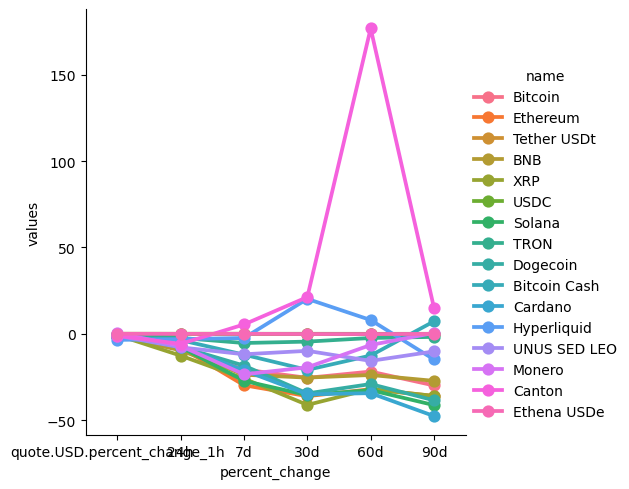

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [52]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69215.371993,2026-02-05 16:34:25.791605


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

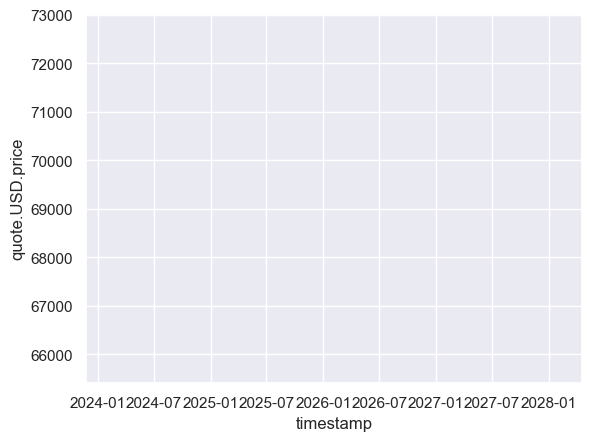

In [53]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)